# Example 2: Wavelet analysis

In this example we will closely follow [Example 2](https://github.com/paudetseis/PlateFlex/blob/master/plateflex/examples/Notebooks/Ex2_wavelet_analysis.ipynb) in `PlateFlex` by calculating the 2D wavelet transform and scalogram of the data and plot them.

Let's start again by importing the data into a `MagGrid` object and deal with outliers as before. 

In [1]:
import numpy as np
import pandas as pd
from platecurie import MagGrid

xmin, xmax, ymin, ymax, zmin, zmax, dx, dy, nx, ny = \
pd.read_csv('../data/Mag_NWCAN.xyz', sep='\t', nrows=0).columns[1:].values.astype(float)
nx = int(nx); ny = int(ny)

magdata = pd.read_csv('../data/Mag_NWCAN.xyz', sep='\t', \
    skiprows=1, names=['x', 'y', 'z'])['z'].values.reshape(ny,nx)[::-1]

magdata[magdata<-750] = np.nan
magdata[magdata>1000] = np.nan

# Load the data into a MagGrid object
mag = MagGrid(magdata, dx, dy)

# Generate a mask
mask = (magdata==0)

grid contains NaN values. Performing interpolation...


Now we can calculate the wavelet transform with a simple call to the method `wlet_transform()`:

<div class="alert alert-block alert-info">
<b>Note:</b> This step will take a significant amount of time as the wavelet transform is performed in the Fourier domain by calculating <i>ns</i> (here <i>ns</i>=23) times <i>na</i>=11 FFTs in 2D, each with size <i>n2(nx*2)</i> times <i>n2(ny*2)</i>, where <i>ns</i> is the number of wavenumber samples, <i>na</i> is the number of azimuths, and <i>n2</i> is the next power of 2 of the corresponding argument. The factor 2 in <i>n2(nx*2)</i> is due to the effect of mirroring the grids in two dimensions.
</div>

In [2]:
mag.wlet_transform()

The coefficients of the wavelet transform are now available as object attributes

In [3]:
mag.__dict__.keys()

dict_keys(['nx', 'ny', 'dx', 'dy', 'units', 'sg_units', 'logsg_units', 'title', 'ns', 'k', 'data', 'wl_trans'])

The wavelet coefficients have a shape of (`nx`, `ny`, `na`=11, `ns`), where `na` is the number of azimuths over which the Morlet wavelet is defined (11 is hard coded to obtain an isotropic fan wavelet), and `ns` is the number of wavenumbers calculated during initialization of the `MagGrid` object.

In [4]:
mag.wl_trans.shape

(901, 709, 11, 23)

You can now plot the transform at single azimuth and wavenumber indices. Note that default plotting arguments can be changed, as before.

<div class="alert alert-block alert-info">
<b>Note:</b> If you try to plot the coefficients of the wavelet transform before calculating it, the plot_transform() method will first call the wlet_transform() method and store the coefficients as attributes.
</div>

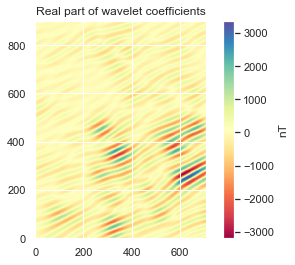

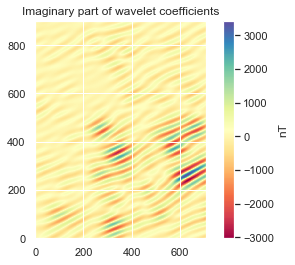

In [5]:
mag.plot_transform(kindex=9, aindex=4, cmap='Spectral')

Note that the wavelet transform returns a complex array, and the real and imaginary parts are plotted separately.

To calculate the wavelet scalogram, you could type `mag.wlet_scalogram()`, but instead we will try to plot it directly, which, as for the `plot_transform()` method, will calculate it first anyway!

Calculating the scalogram first


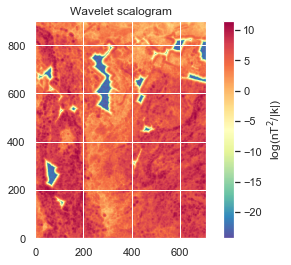

In [6]:
mag.plot_scalogram(kindex=20, cmap='Spectral_r', log=True)

Here we plotted the log value of the scalogram, since it is equivalent to the power-spectral density but for the wavelet transform. 

<div class="alert alert-block alert-warning">
<b>Warning:</b> You will notice some edge effects at the borders of the grid (mostly at the bottom and left edges, due to mirroring along the top and right edges), particularly at higher wavenumbers (shorter wavelengths). These are due to Gibbs effects near the sharp edges of the grid, since we use the FFT to calculate the wavelet transform. Having a grid larger than your region of interest is always a good idea.
</div>

If you try with increasingly higher `kindex` values, you will notice that the regions set to `0` due to data gaps become very well resolved (e.g., `kindex=20`). It becomes obvious that these regions will not produce realistic estimates and is why we will mask them later on.

Now go to Example 3 to estimate the parameters of the magnetic layer.